In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from util import *


# PATH_WINDOWS = '..\\data\\round1\\prices_round_'
# PATH_LINUX = '..\data\round1\prices_round_'
PATH_MAC_PRICES = '/Users/albertyang/Desktop/IMC_Prosperity/data/round-1-island-data-bottle/prices_round_'
PATH_MAC_TRADES = '/Users/albertyang/Desktop/IMC_Prosperity/data/round-1-island-data-bottle/trades_round_'

path_prices = PATH_MAC_PRICES
path_trades = PATH_MAC_TRADES
round = 1

data0_prices = pd.read_csv(filepath_or_buffer = f'{path_prices}{round}_day_0.csv', sep=';')
data1_prices = pd.read_csv(filepath_or_buffer = f'{path_prices}{round}_day_-1.csv', sep=';')
data2_prices = pd.read_csv(filepath_or_buffer = f'{path_prices}{round}_day_-2.csv', sep=';')

data0_trades = pd.read_csv(filepath_or_buffer = f'{path_trades}{round}_day_0.csv', sep=';')
data1_trades = pd.read_csv(filepath_or_buffer = f'{path_trades}{round}_day_-1.csv', sep=';')
data2_trades = pd.read_csv(filepath_or_buffer = f'{path_trades}{round}_day_-2.csv', sep=';')

In [2]:
asset = 'SQUID_INK'


data_0_prices = data0_prices.loc[data0_prices['product'] == asset]
data_1_prices = data1_prices.loc[data1_prices['product'] == asset]
data_2_prices = data2_prices.loc[data2_prices['product'] == asset]

data_0_trades = data0_trades.loc[data0_trades['symbol'] == asset]
data_1_trades = data1_trades.loc[data1_trades['symbol'] == asset]
data_2_trades = data2_trades.loc[data2_trades['symbol'] == asset]

all_prices = pd.concat([data_0_prices, data_1_prices, data_2_prices], axis=0)
all_trades = pd.concat([data_0_trades, data_1_trades, data_2_trades], axis=0)

In [3]:
all_prices['mid_diff'] = all_prices['mid_price'] - all_prices['mid_price'].shift(1)
all_prices['mid_return'] = all_prices['mid_diff'] / all_prices['mid_price'].shift(1)


In [20]:
all_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
4,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6
8,500,NaN,NaN,SQUID_INK,SEASHELLS,1970.0,1
10,1300,NaN,NaN,SQUID_INK,SEASHELLS,1970.0,2
11,1300,NaN,NaN,SQUID_INK,SEASHELLS,1968.0,5
13,1400,NaN,NaN,SQUID_INK,SEASHELLS,1969.0,1
...,...,...,...,...,...,...,...
8388,997900,NaN,NaN,SQUID_INK,SEASHELLS,2000.0,12
8391,998000,NaN,NaN,SQUID_INK,SEASHELLS,2000.0,1
8392,998000,NaN,NaN,SQUID_INK,SEASHELLS,2001.0,4
8394,998900,NaN,NaN,SQUID_INK,SEASHELLS,2001.0,1


In [5]:
data_0_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
4,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6
8,500,NaN,NaN,SQUID_INK,SEASHELLS,1970.0,1
10,1300,NaN,NaN,SQUID_INK,SEASHELLS,1970.0,2
11,1300,NaN,NaN,SQUID_INK,SEASHELLS,1968.0,5
13,1400,NaN,NaN,SQUID_INK,SEASHELLS,1969.0,1
...,...,...,...,...,...,...,...
8171,998500,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,10
8173,998700,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,1
8176,998800,NaN,NaN,SQUID_INK,SEASHELLS,1831.0,1
8179,999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2


In [21]:
plot_xy(
    get_column(data_1_trades, 'timestamp'),
    get_column(data_1_trades, 'price'),
)

In [7]:
plot_xyxy(
    get_column(data_0_trades, 'timestamp'),
    get_column(data_0_trades, 'price'),
    get_column(data_1_prices, 'timestamp'),
    calculate_weighted_mid(data_0_prices),
    x_label='timestamp',
    y_label='price',
    y2_label='weighted_mid_price',
)


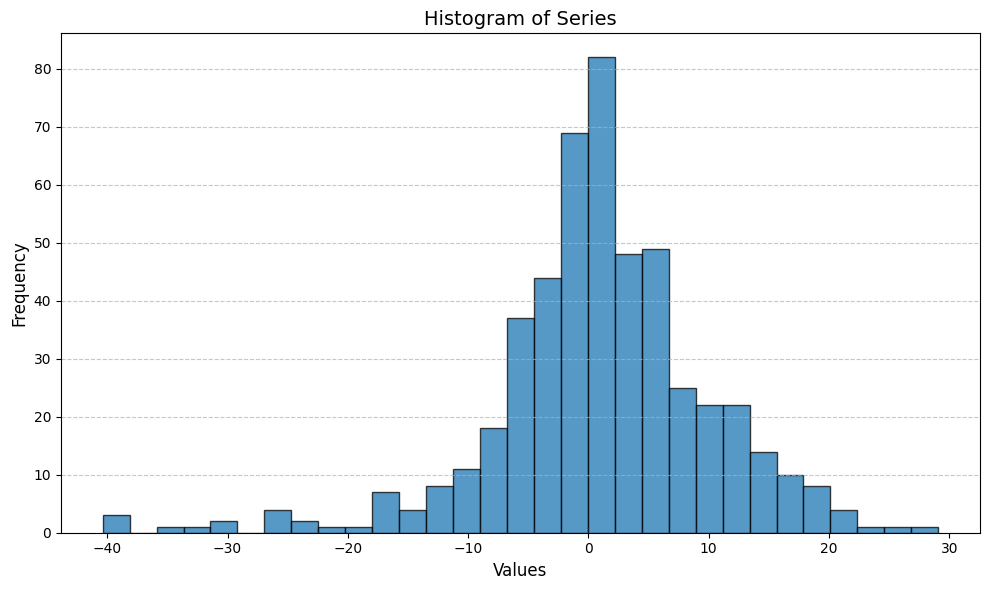

<Axes: title={'center': 'Histogram of Series'}, xlabel='Values', ylabel='Frequency'>

In [8]:
sm_trades_mid = smooth_series_fixed_length(
    get_column(data_0_trades, 'price'), 500)

sm_prices_mid = smooth_series_fixed_length(calculate_weighted_mid(data_0_prices), 500)

plot_xy(sm_trades_mid, sm_prices_mid)
plot_histogram_from_series(sm_prices_mid - sm_trades_mid)



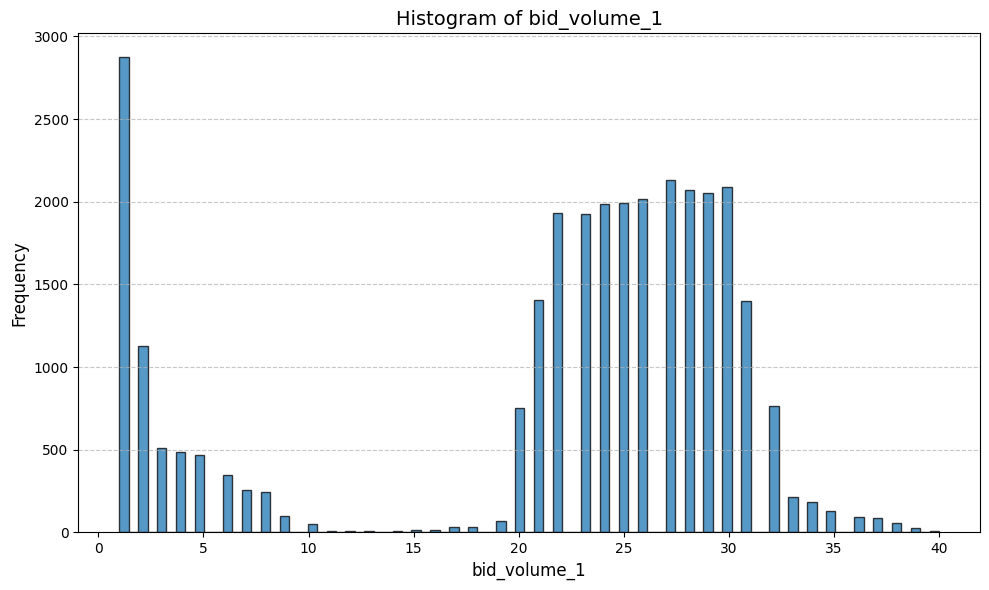

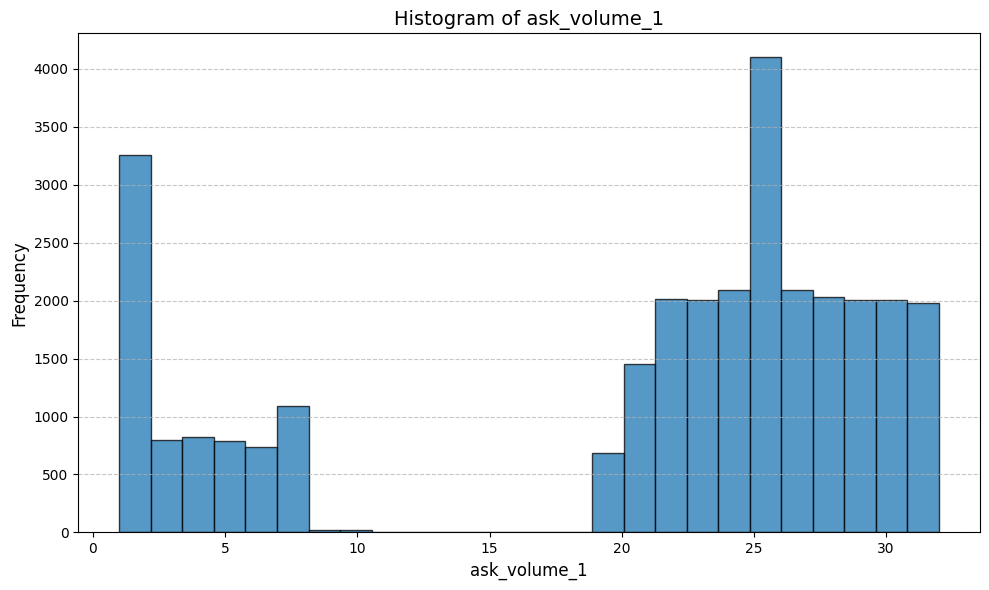

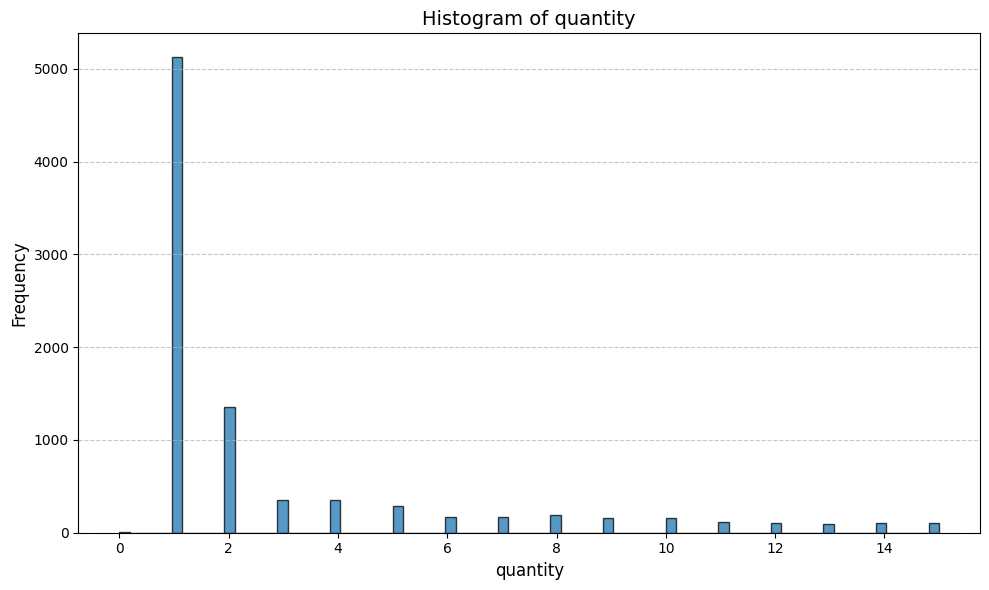

In [9]:
# volume
plot_histogram_from_series(get_column(all_prices, 'bid_volume_1'))
plot_histogram_from_series(get_column(all_prices, 'ask_volume_1'))

plot_histogram_from_series(get_column(all_trades, 'quantity'))

plot_xy(get_column(all_prices, 'bid_volume_1'), get_column(all_prices, 'bid_price_1'), 
        x_label='bid_volume_1', y_label='bid_price_1')


# plot_histogram_from_series(
#     get_column(data_1_prices, 'bid_volume_1') )
# plot_histogram_from_series(get_column(data_1_prices, 'bid_volume_2'))
# plot_histogram_from_series(get_column(data_1_prices, 'bid_volume_3'))

In [10]:
all_prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid_diff,mid_return
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0,NaN,NaN
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0,0.5,0.000254
6,0,200,SQUID_INK,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN,1967.5,0.0,-2.5,-0.001269
9,0,300,SQUID_INK,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN,1966.5,0.0,-1.0,-0.000508
14,0,400,SQUID_INK,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN,1967.0,0.0,0.5,0.000254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,-2,999500,SQUID_INK,2000,26,NaN,NaN,NaN,NaN,2003,26,NaN,NaN,NaN,NaN,2001.5,0.0,-1.0,-0.000499
29990,-2,999600,SQUID_INK,2001,30,NaN,NaN,NaN,NaN,2004,30,NaN,NaN,NaN,NaN,2002.5,0.0,1.0,0.000500
29992,-2,999700,SQUID_INK,2001,22,NaN,NaN,NaN,NaN,2005,22,NaN,NaN,NaN,NaN,2003.0,0.0,0.5,0.000250
29994,-2,999800,SQUID_INK,2002,26,NaN,NaN,NaN,NaN,2004,3,2005.0,26.0,NaN,NaN,2003.0,0.0,0.0,0.000000


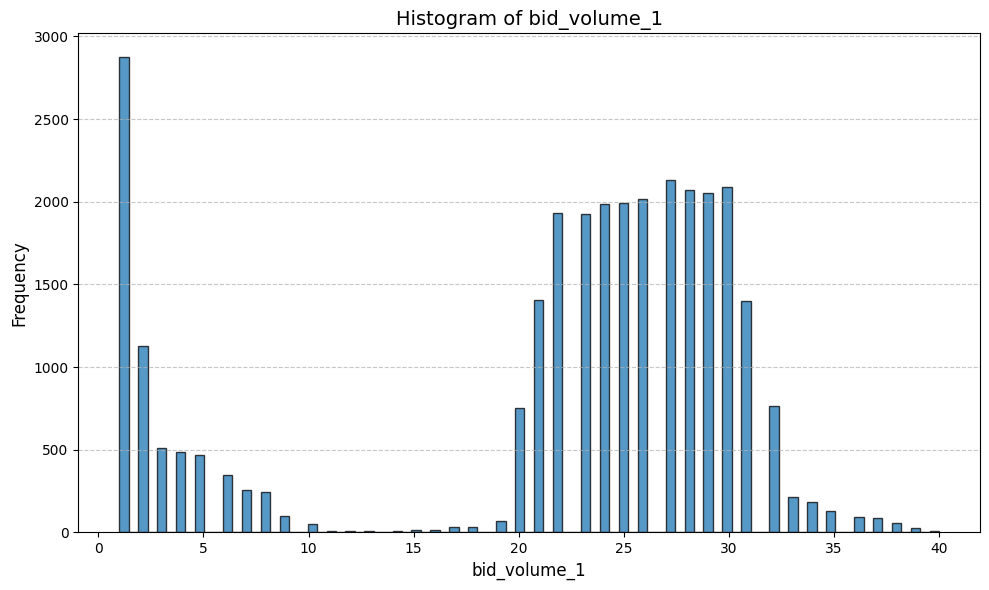

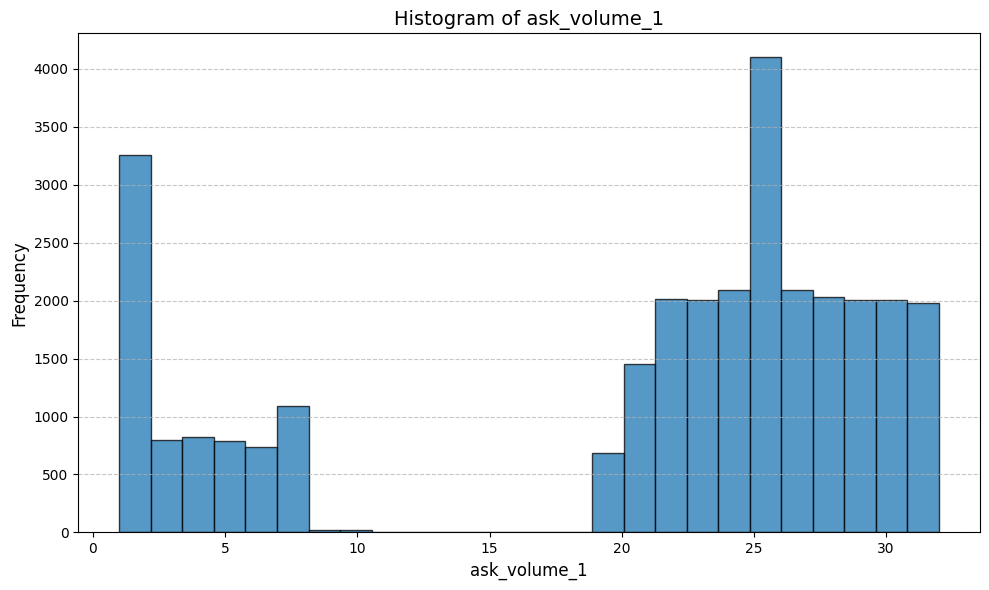

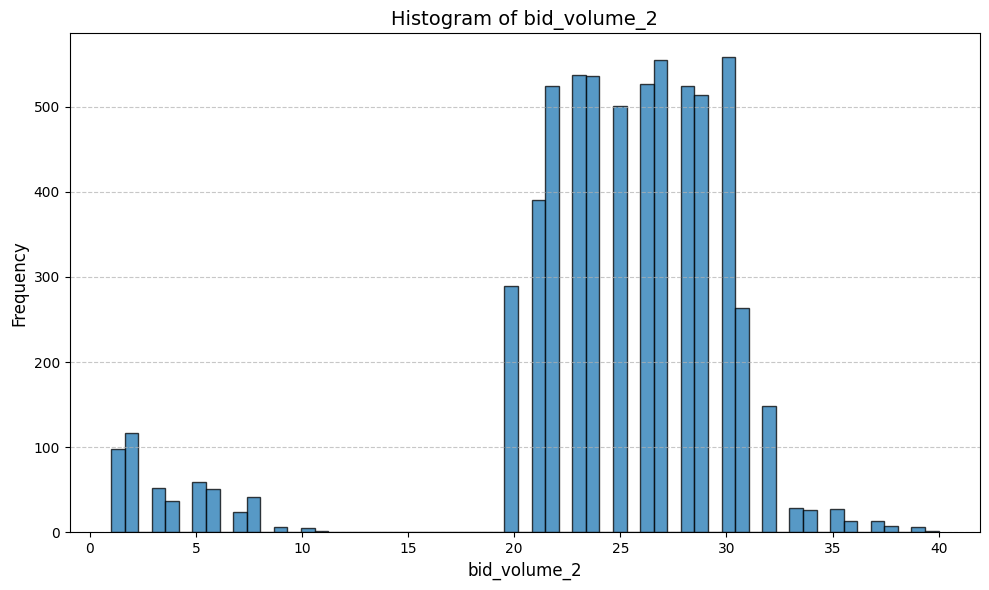

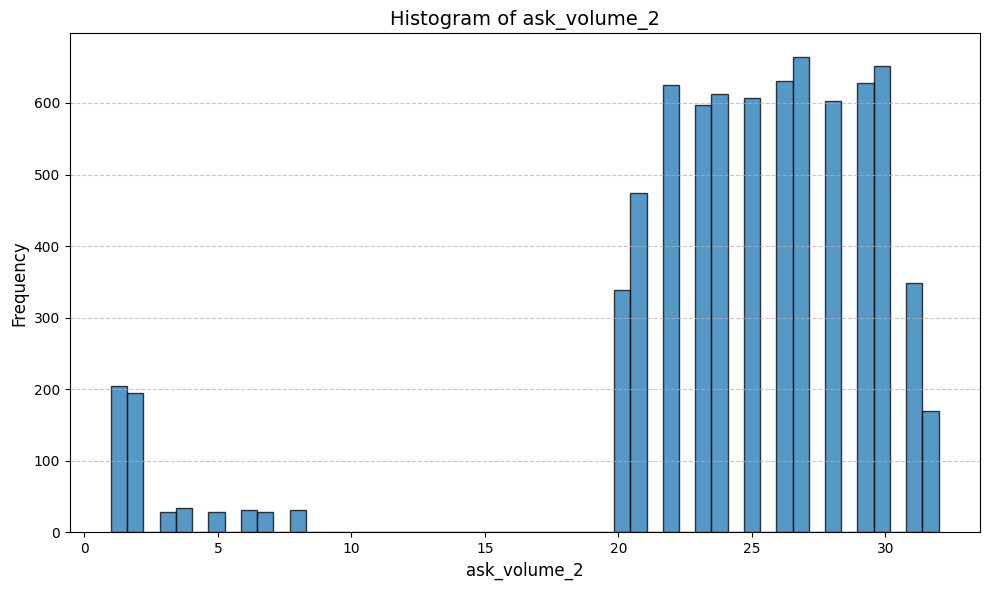

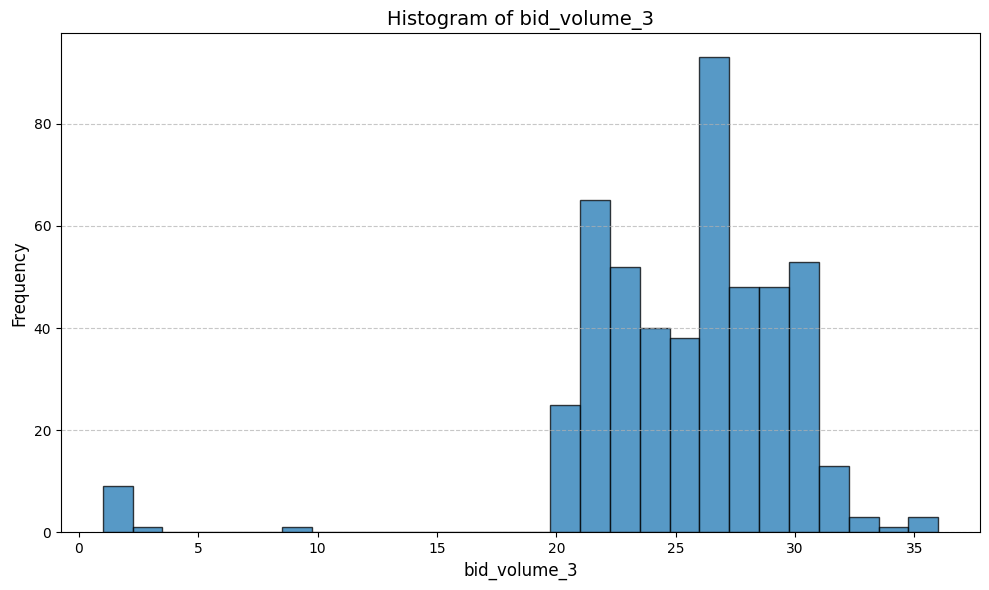

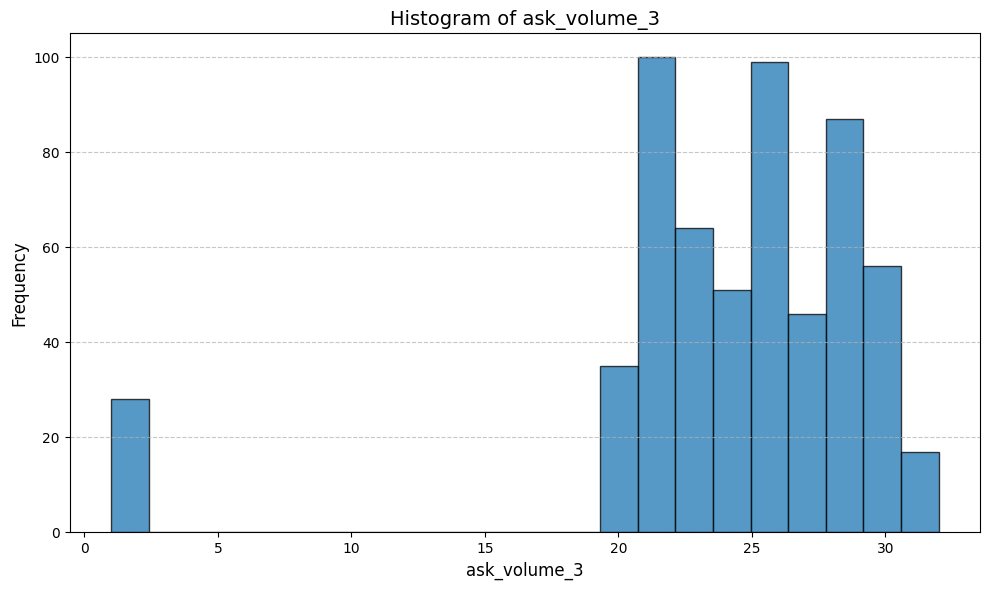

In [11]:
# volume
plot_histogram_from_series(get_column(all_prices, 'bid_volume_1'))
plot_histogram_from_series(get_column(all_prices, 'ask_volume_1'))

plot_histogram_from_series(get_column(all_prices, 'bid_volume_2'))
plot_histogram_from_series(get_column(all_prices, 'ask_volume_2'))

plot_histogram_from_series(get_column(all_prices, 'bid_volume_3'))
plot_histogram_from_series(get_column(all_prices, 'ask_volume_3'))


plot_xy(get_column(all_prices, 'mid_diff'), get_column(all_prices, 'bid_price_1'), 
        x_label='mid_diff', y_label='bid_price_1')



# plot_histogram_from_series(
#     get_column(data_1_prices, 'bid_volume_1') )
# plot_histogram_from_series(get_column(data_1_prices, 'bid_volume_2'))
# plot_histogram_from_series(get_column(data_1_prices, 'bid_volume_3'))

In [12]:
plot_xy(get_column(all_prices, 'mid_return'), get_column(all_prices, 'bid_price_1'), 
        x_label='bid_volume_1', y_label='bid_price_1')

In [13]:
plot_xy(get_column(all_prices, 'mid_diff'), get_column(all_prices, 'bid_volume_1'), 
        x_label='mid_diff', y_label='bid_price_1')

In [14]:
av_prices_df = aggregate_trades_by_timestamp(data_0_trades)

av_prices_prices = filter_df_by_timestamps(av_prices_df, data_0_prices)

diff = av_prices_df['price'].reset_index(drop=True) - av_prices_prices['bid_price_1'].reset_index(drop=True)


print(diff)

# print(av_prices_df)
# print(av_prices_prices)
plot_xy(get_column(av_prices_prices, 'ask_volume_1'), diff,
        x_label='volume', y_label='diff to traded price', color_threshold=12)

0       0.0
1       4.0
2       1.0
3       0.0
4       0.0
       ... 
2498    0.0
2499    2.0
2500    0.0
2501    0.0
2502    0.0
Length: 2503, dtype: float64
